Seaborn Exercises

Using 'Iris' Database

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from env import host, username, password, get_db_url

In [79]:
url = get_db_url('iris_db')

In [80]:
pd.read_sql('SHOW TABLES', url)

,Tables_in_iris_db
0,measurements
1,species


In [81]:
iris_measurements = pd.read_sql('''SELECT * FROM measurements''', url)
iris_measurements

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [82]:
iris_species = pd.read_sql('''SELECT * FROM species''', url)
iris_species

,species_id,species_name
0,1,setosa
1,2,versicolor
2,3,virginica


PROBLEM 1: What does the distribution of petal lengths look like?

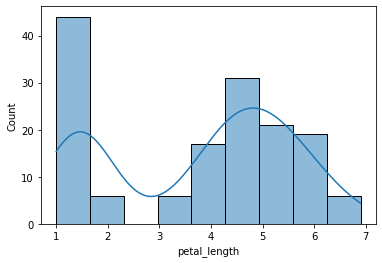

In [83]:
sns.histplot(iris_measurements.petal_length, kde=True)
plt.show()

PROBLEM 2: Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

In [84]:
iris_len_wid = iris_measurements[['petal_length','petal_width']]
iris_len_wid

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [85]:
len_wid_corr = iris_len_wid.corr(method='pearson')
len_wid_corr

,petal_length,petal_width
petal_length,1.000000,0.962865
petal_width,0.962865,1.000000


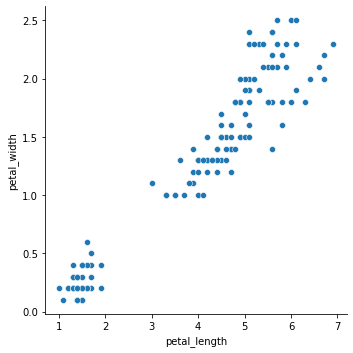

In [86]:
sns.relplot(x='petal_length',y='petal_width',data=iris_len_wid)

They do seem to be corrilated.

PROBLEM 3: Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

In [87]:
iris_meas_spec = iris_measurements.merge(iris_species, how = 'inner',on= 'species_id')
iris_meas_spec

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3,virginica
146,147,6.3,2.5,5.0,1.9,3,virginica
147,148,6.5,3.0,5.2,2.0,3,virginica
148,149,6.2,3.4,5.4,2.3,3,virginica


<AxesSubplot:xlabel='sepal_length', ylabel='species_name'>

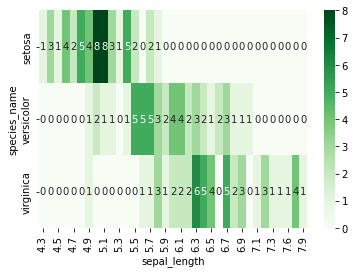

In [88]:
spec_sepal_len = pd.crosstab(iris_meas_spec.species_name, iris_meas_spec['sepal_length'])
sns.heatmap(spec_sepal_len, annot=True, cmap=plt.cm.Greens)

<AxesSubplot:xlabel='sepal_width', ylabel='species_name'>

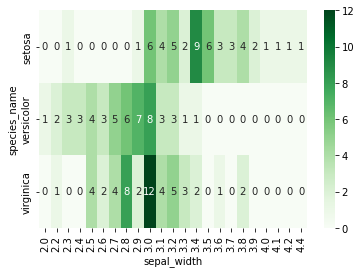

In [89]:
spec_sepal_len = pd.crosstab(iris_meas_spec.species_name, iris_meas_spec['sepal_width'])
sns.heatmap(spec_sepal_len, annot=True, cmap=plt.cm.Greens)

In [93]:
spec_sepal = iris_meas_spec [['sepal_length','sepal_width','species_name']]
spec_sepal

,sepal_length,sepal_width,species_name
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
145,6.7,3.0,virginica
146,6.3,2.5,virginica
147,6.5,3.0,virginica
148,6.2,3.4,virginica


In [94]:
spec_sepal['sepal_length'] = pd.cut(spec_sepal['sepal_length'], 20)

/var/folders/lg/ftvnw2s97_z5h66qcl3vwwf00000gn/T/ipykernel_4023/1544318840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spec_sepal['sepal_length'] = pd.cut(spec_sepal['sepal_length'], 20)


In [95]:
spec_sepal['sepal_width'] = pd.cut(spec_sepal['sepal_width'], 20)

/var/folders/lg/ftvnw2s97_z5h66qcl3vwwf00000gn/T/ipykernel_4023/4132042076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spec_sepal['sepal_width'] = pd.cut(spec_sepal['sepal_width'], 20)


<AxesSubplot:xlabel='sepal_length', ylabel='species_name'>

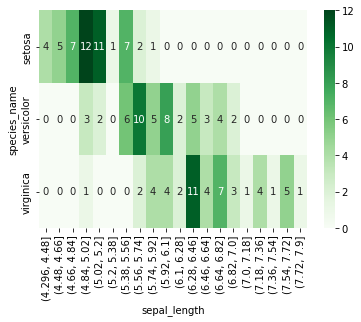

In [96]:
spec_sepal_len_2 = pd.crosstab(spec_sepal.species_name, spec_sepal['sepal_length'])
sns.heatmap(spec_sepal_len_2, annot=True, cmap=plt.cm.Greens)

<AxesSubplot:xlabel='sepal_width', ylabel='species_name'>

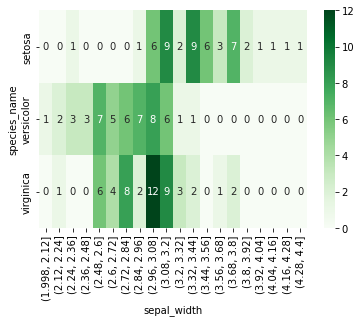

In [97]:
spec_sepal_len_2 = pd.crosstab(spec_sepal.species_name, spec_sepal['sepal_width'])
sns.heatmap(spec_sepal_len_2, annot=True, cmap=plt.cm.Greens)

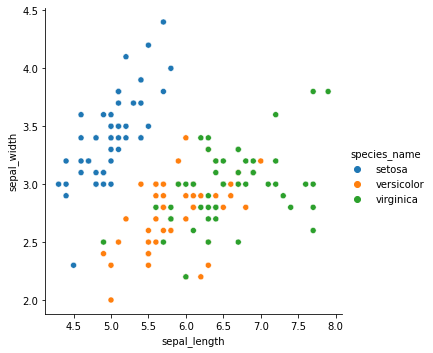

In [98]:
sns.relplot(x = 'sepal_length', y = 'sepal_width', hue = 'species_name', data = iris_meas_spec)

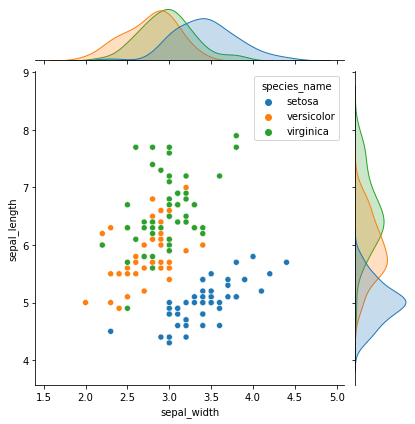

In [99]:
sns.jointplot(data= iris_meas_spec, x = 'sepal_width', y = 'sepal_length', hue = 'species_name')

Looking at the heatmap it does look as though there is some or